# Analyzing Used Car Listings on eBay

In this project, we'll work with a dataset of used cars from German eBay website.

# **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
autos = pd.read_csv("auctioned.csv",encoding = "latin-1")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## **Information about the data**

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

## **Statistical Analysis**

In [4]:
autos.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dateCrawled,50000,48213,2016-04-02 11:37:04,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,50000,38754,Ford_Fiesta,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller,50000,2,privat,49999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offerType,50000,2,Angebot,49999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,50000,2357,$0,1421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abtest,50000,2,test,25756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicleType,44905,8,limousine,12859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearOfRegistration,50000.0,NaN,NaN,NaN,2005.07328,105.712813,1000.0,1999.0,2003.0,2008.0,9999.0
gearbox,47320,2,manuell,36993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powerPS,50000.0,NaN,NaN,NaN,116.35592,209.216627,0.0,70.0,105.0,150.0,17700.0


## **Checking the Null Values** 

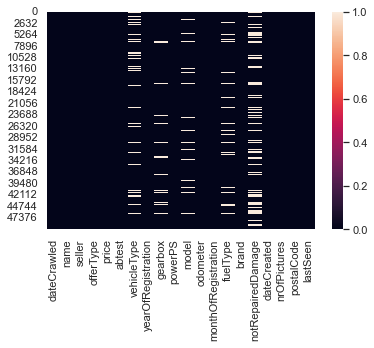

In [5]:
sns.heatmap(autos.isna())
plt.show()

## **Dropping the columns from the dataset**

In [6]:
autos.drop(["seller","offerType","nrOfPictures"],axis = 1,inplace = True)

## **Converting the "dateCrawled" datatype into datetime**

In [7]:
autos["dateCrawled"] = pd.to_datetime(autos["dateCrawled"])

In [8]:
autos["dateCrawled"].max()

Timestamp('2016-04-07 14:36:56')

## **Cleaning the data**

In [9]:
autos["price"] = autos["price"].str.strip("$").str.replace(",","").astype(float)

In [10]:
autos["odometer"] = autos["odometer"].str.strip("km").str.replace(",","").astype(float)

In [11]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50000 non-null  datetime64[ns]
 1   name                 50000 non-null  object        
 2   price                50000 non-null  float64       
 3   abtest               50000 non-null  object        
 4   vehicleType          44905 non-null  object        
 5   yearOfRegistration   50000 non-null  int64         
 6   gearbox              47320 non-null  object        
 7   powerPS              50000 non-null  int64         
 8   model                47242 non-null  object        
 9   odometer             50000 non-null  float64       
 10  monthOfRegistration  50000 non-null  int64         
 11  fuelType             45518 non-null  object        
 12  brand                50000 non-null  object        
 13  notRepairedDamage    40171 non-

In [12]:
autos["yearOfRegistration"].value_counts().sort_index().head(10)

1000    1
1001    1
1111    1
1500    1
1800    2
1910    9
1927    1
1929    1
1931    1
1934    2
Name: yearOfRegistration, dtype: int64

In [13]:
autos["yearOfRegistration"].value_counts().sort_index().tail(15)

2016    1316
2017    1453
2018     492
2019       3
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       2
9996       1
9999       4
Name: yearOfRegistration, dtype: int64

In [14]:
autos["yearOfRegistration"].between(1900,2016).sum()

48028

In [15]:
# manually calculation
total_minus = 50000 - 48028
print(total_minus)
# taking out the percentage
div = total_minus * 100 / 50000
print(div)

1972
3.944


In [16]:
(~autos["yearOfRegistration"].between(1900,2016)).sum()

1972

In [17]:
(~autos["yearOfRegistration"].between(1900,2016)).sum()*100/autos.shape[0]

3.944

In [18]:
bol_reg = autos["yearOfRegistration"].between(1900,2016)

In [19]:
corrected_autos = autos[bol_reg].copy()

In [20]:
corrected_autos["yearOfRegistration"].min()

1910

In [21]:
corrected_autos["yearOfRegistration"].max()

2016

In [22]:
corrected_autos["price"].describe()

count    4.802800e+04
mean     9.585252e+03
std      4.843817e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.990000e+03
75%      7.400000e+03
max      1.000000e+08
Name: price, dtype: float64

In [23]:
corrected_autos["price"].value_counts().sort_index()

0.0           1335
1.0            150
2.0              2
3.0              1
5.0              2
              ... 
10000000.0       1
11111111.0       2
12345678.0       1
27322222.0       1
99999999.0       1
Name: price, Length: 2334, dtype: int64

In [24]:
corrected_autos["price"].value_counts().sort_index().tail(15)

265000.0      1
295000.0      1
299000.0      1
345000.0      1
350000.0      1
999990.0      1
999999.0      2
1234566.0     1
1300000.0     1
3890000.0     1
10000000.0    1
11111111.0    2
12345678.0    1
27322222.0    1
99999999.0    1
Name: price, dtype: int64

In [25]:
price_bol = corrected_autos["price"].between(1,350000)

In [26]:
cleaned = corrected_autos[price_bol].copy()

In [27]:
cleaned["price"].min()

1.0

In [28]:
cleaned["price"].max()

350000.0

In [29]:
(corrected_autos.shape[0] - cleaned.shape[0]) * 100 / corrected_autos.shape[0]

2.8046139751811445

In [30]:
cleaned.shape

(46681, 17)

In [31]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46681 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          46681 non-null  datetime64[ns]
 1   name                 46681 non-null  object        
 2   price                46681 non-null  float64       
 3   abtest               46681 non-null  object        
 4   vehicleType          43977 non-null  object        
 5   yearOfRegistration   46681 non-null  int64         
 6   gearbox              44571 non-null  object        
 7   powerPS              46681 non-null  int64         
 8   model                44488 non-null  object        
 9   odometer             46681 non-null  float64       
 10  monthOfRegistration  46681 non-null  int64         
 11  fuelType             43363 non-null  object        
 12  brand                46681 non-null  object        
 13  notRepairedDamage    38374 non-

In [32]:
norm_brands = cleaned["brand"].value_counts(normalize = True)*100

In [33]:
bol = norm_brands > 5
common_brand = norm_brands[bol]
common_brand

volkswagen       21.126368
bmw              11.004477
opel             10.758124
mercedes_benz     9.646323
audi              8.656627
ford              6.989996
Name: brand, dtype: float64

In [34]:
common_brand.index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [35]:
brand_bol = cleaned["brand"].isin(common_brand.index)

In [36]:
popular_brand = cleaned[brand_bol].copy()

In [37]:
popular_brand["brand"].value_counts()

volkswagen       9862
bmw              5137
opel             5022
mercedes_benz    4503
audi             4041
ford             3263
Name: brand, dtype: int64

In [38]:
popular_brand.shape

(31828, 17)

In [39]:
popular_brand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31828 entries, 1 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          31828 non-null  datetime64[ns]
 1   name                 31828 non-null  object        
 2   price                31828 non-null  float64       
 3   abtest               31828 non-null  object        
 4   vehicleType          30015 non-null  object        
 5   yearOfRegistration   31828 non-null  int64         
 6   gearbox              30494 non-null  object        
 7   powerPS              31828 non-null  int64         
 8   model                30679 non-null  object        
 9   odometer             31828 non-null  float64       
 10  monthOfRegistration  31828 non-null  int64         
 11  fuelType             29629 non-null  object        
 12  brand                31828 non-null  object        
 13  notRepairedDamage    26053 non-

In [40]:
popular_brand.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300.0,test,limousine,1995,manuell,90,golf,150000.0,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990.0,control,limousine,1998,manuell,90,golf,150000.0,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32


In [41]:
brand_mean_price = popular_brand.groupby("brand")["price"].mean().sort_values(ascending = False)
brand_mean_price

brand
audi             9336.687454
mercedes_benz    8628.450366
bmw              8332.820518
volkswagen       5402.410262
ford             3749.469507
opel             2975.241935
Name: price, dtype: float64

In [42]:
brand_mean_mileage = popular_brand.groupby("brand")["odometer"].mean().sort_values(ascending = False)
brand_mean_mileage

brand
bmw              132572.513140
mercedes_benz    130788.363313
opel             129310.035842
audi             129157.386785
volkswagen       128707.158791
ford             124266.012872
Name: odometer, dtype: float64

In [43]:
price_mil = pd.DataFrame(data = brand_mean_price)

In [44]:
price_mil.columns = ["mean_price"]

In [45]:
price_mil.index.name = None

In [46]:
price_mil["mean_mileage"] = brand_mean_mileage

In [47]:
price_mil

,mean_price,mean_mileage
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8332.820518,132572.513140
volkswagen,5402.410262,128707.158791
ford,3749.469507,124266.012872
opel,2975.241935,129310.035842


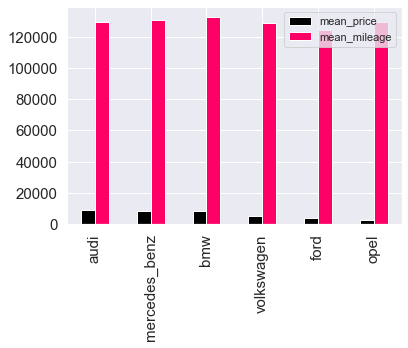

In [48]:
price_mil.plot.bar(fontsize = 15,color=['black', '#FF0066'])
plt.show()

In [49]:
normalize = price_mil.copy()

In [50]:
cols = price_mil.columns
cols

Index(['mean_price', 'mean_mileage'], dtype='object')

In [51]:
for norm in cols:
    normalize[norm] = normalize[norm]/normalize[norm].sum()

In [52]:
normalize

,mean_price,mean_mileage
audi,0.242984,0.166697
mercedes_benz,0.224553,0.168802
bmw,0.216859,0.171105
volkswagen,0.140596,0.166116
ford,0.097579,0.160384
opel,0.077430,0.166894


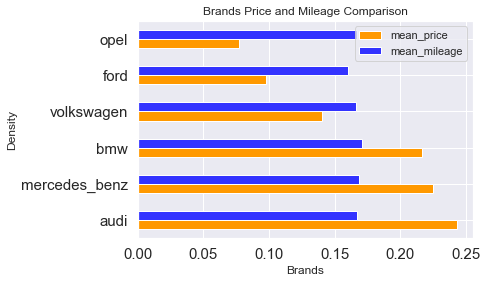

In [53]:
normalize.plot.barh(title = "Brands Price and Mileage Comparison",
                  fontsize = 15,color = ["#FF9900","#3333FF"])
plt.xlabel("Brands")
plt.ylabel("Density")
plt.show()

In [54]:
brand_model = popular_brand.groupby("brand")["model"].value_counts()
brand_model

brand       model  
audi        a4         1231
            a3          825
            a6          797
            andere      216
            80          198
                       ... 
volkswagen  up           51
            jetta        38
            phaeton      31
            cc           18
            amarok        6
Name: model, Length: 96, dtype: int64

In [55]:
c_b = common_brand.index

In [56]:
b_top_m = {}
for i in c_b:
    model = brand_model[i].index[0]
    b_top_m[i] = model

In [57]:
top_models = pd.DataFrame(b_top_m.items(), columns=['Brands', 'Models'])
print("Top 5 Brand Models Car")
top_models

Top 5 Brand Models Car


,Brands,Models
0,volkswagen,golf
1,bmw,3er
2,opel,corsa
3,mercedes_benz,c_klasse
4,audi,a4
5,ford,focus
